# Read PPM image and export it as three (R,G,B) FITS images

### Copied from
### http://docs.astropy.org/en/stable/generated/examples/io/split-jpeg-to-fits.html

In [1]:
import numpy as np
from PIL import Image
from astropy.io import fits

In [2]:
# Set up matplotlib and use a nicer set of plot parameters

import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [3]:
image = Image.open('STA3.ppm')
xsize, ysize = image.size
print("Image size: {} x {}".format(xsize, ysize))

Image size: 512 x 512


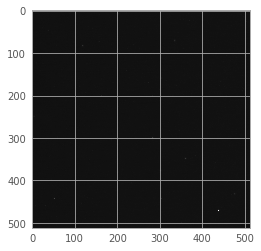

In [4]:
plt.imshow(image)

In [5]:
# Split the three channels (RGB) and get the data as Numpy arrays. 
# The arrays are flattened, so they are 1-dimensional:

r, g, b = image.split()
r_data = np.array(r.getdata()) # data is now an array of length ysize*xsize
g_data = np.array(g.getdata())
b_data = np.array(b.getdata())
print(r_data.shape)

(262144,)


In [6]:
# Reshape the image arrays to be 2-dimensional:

r_data = r_data.reshape(ysize, xsize)
g_data = g_data.reshape(ysize, xsize)
b_data = b_data.reshape(ysize, xsize)

In [7]:
# Write out the channels as separate FITS images
# Add some header information

red = fits.PrimaryHDU(data=r_data)
red.header['MISSION'] = "Fermi Gamma-ray Space Telescope" # add header info
red.header['CAMERA'] = "STA3"
red.header['DATE_OBS'] = "2019-02-08"
red.header['TARGET'] = 'Galactic Center for Star Tracker CCD calibration'
red.header['RA'] = '243.4 deg'
red.header['DEC'] = '5.0 deg'
red.header['EPOCH'] = 'J2000'
red.writeto('STA3-red.fits')

grn = fits.PrimaryHDU(data=g_data)
grn.header['MISSION'] = "Fermi Gamma-ray Space Telescope" # add header info
grn.header['CAMERA'] = "STA3"
grn.header['DATE_OBS'] = "2019-02-08"
grn.header['TARGET'] = 'Galactic Center for Star Tracker CCD calibration'
grn.header['RA'] = '243.4 deg'
grn.header['DEC'] = '5.0 deg'
grn.header['EPOCH'] = 'J2000'
grn.writeto('STA3-green.fits')

blu = fits.PrimaryHDU(data=b_data)
blu.header['MISSION'] = "Fermi Gamma-ray Space Telescope" # add header info
blu.header['CAMERA'] = "STA3"
blu.header['DATE_OBS'] = "2019-02-08"
blu.header['TARGET'] = 'Galactic Center for Star Tracker CCD calibration'
blu.header['RA'] = '243.4 deg'
blu.header['DEC'] = '5.0 deg'
blu.header['EPOCH'] = 'J2000'
blu.writeto('STA3-blue.fits')